In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
titanic_data = pd.read_csv(r'C:\Users\isaia\Documents\titanic_project\train.csv')

### Data Dictionary

| Variable  | Definition                           | Key                                      |
|-----------|--------------------------------------|------------------------------------------|
| survival  | Survival                             | 0 = No, 1 = Yes                           |
| pclass    | Ticket class                         | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| sex       | Sex                                  |                                          |
| age       | Age in years                         |                                          |
| sibsp     | # of siblings/spouses aboard         |                                          |
| parch     | # of parents/children aboard         |                                          |
| ticket    | Ticket number                        |                                          |
| fare      | Passenger fare                       |                                          |
| cabin     | Cabin number                         |                                          |
| embarked  | Port of Embarkation                  | C = Cherbourg, Q = Queenstown, S = Southampton |

In [5]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

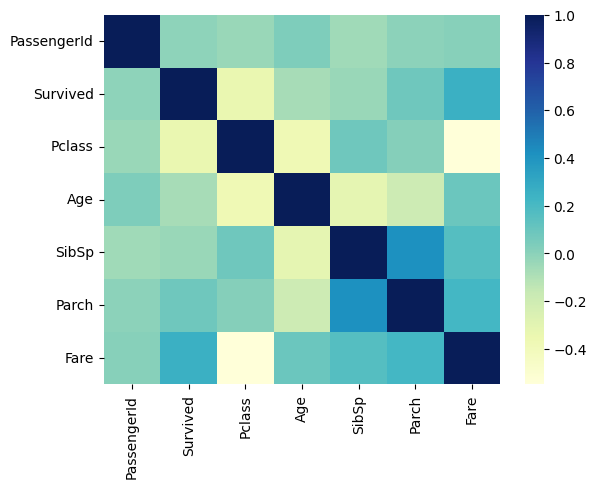

In [7]:
import seaborn as sns
sns.heatmap(titanic_data.corr(numeric_only=True), cmap = "YlGnBu")
plt.show()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit  # Import the class for stratified train-test splitting with shuffling

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)  # Create a splitter that performs 1 split, with 20% of the data in the test set

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):  
    # Use the splitter to generate train/test indices based on stratified sampling of the 'Survived', 'Pclass', and 'Sex' columns
    # This ensures the train and test sets maintain the same proportions of these combinations as in the full dataset

    strat_train_set = titanic_data.loc[train_indices]  # Select the training rows using the generated train indices

    strat_test_set = titanic_data.loc[test_indices]  # Select the test rows using the generated test indices

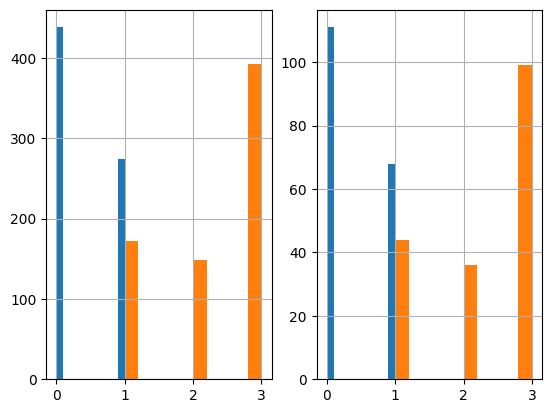

In [9]:
# 1 row, 2 columns
plt.subplot(1, 2, 1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1, 2, 2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
# Survived: 0 = did not survive, 1 = survived.
# Pclass: 1 = 1st class, 2 = 2nd class, 3 = 3rd class.
plt.show()
# similar distributions

In [10]:
# missing data in age, cabin, and embarked
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 741 to 67
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin   # Import base classes to create custom transformer
from sklearn.impute import SimpleImputer                   # Import imputer to handle missing values

class AgeImputer(BaseEstimator, TransformerMixin):         # Create custom transformer that imputes Age column
    
    def fit(self, X, y = None):                            # fit method takes feature matrix X and optional labels y
        return self                                        # Return self to conform with scikit-learn's fit/transform pattern

    def transform(self, X):                                # transform method performs the actual transformation
        imputer = SimpleImputer(strategy = "mean")         # Create a SimpleImputer to fill in missing values with the mean
        X["Age"] = imputer.fit_transform(X[["Age"]])       # Apply the imputer to the Age column and assign the result back
        return X                                           # Return the modified DataFrame


In [12]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self  # No fitting necessary here, so just return self

    def transform(self, X):
        encoder = OneHotEncoder()  # Create OneHotEncoder instance
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()  # One-hot encode the 'Embarked' column into a numpy array

        column_names = ["C", "S", "Q", "N"]  # Define column names for encoded 'Embarked' categories (N for missing values)

        for i in range(len(matrix.T)):  # Iterate over each encoded category column
            X[column_names[i]] = matrix.T[i]  # Assign each category's binary values as a new column in X

        matrix = encoder.fit_transform(X[["Sex"]]).toarray()  # One-hot encode the 'Sex' column into a numpy array
        
        column_names = ["Female", "Male"]  # Define column names for encoded 'Sex' categories

        for i in range(len(matrix.T)):  # Iterate over each encoded category column
            X[column_names[i]] = matrix.T[i]  # Assign each category's binary values as a new column in X
            
        return X  # Return the updated DataFrame with new one-hot encoded columns


In [13]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        # dropping columns we don't need anymore, or not useful
        # errors = "ignore" means don't raise an error if column is not found
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis = 1, errors = "ignore")

In [14]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

# This creates a pipeline object that chains multiple data preprocessing steps
# Each tuple defines a step with a name and the transformer class instance
# When you call pipeline.fit(X), it applies these steps in order:
#   1. 'ageimputer': fills missing values in 'Age' column using AgeImputer
#   2. 'featureencoder': converts categorical columns into numeric columns with FeatureEncoder
#   3. 'featuredropper': removes unnecessary columns using FeatureDropper
# This ensures consistent, reusable, and clean data preprocessing across datasets


In [15]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [16]:
strat_train_set

PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare    C  \
741          742         0       1  36.000000      1      0  78.8500  0.0   
362          363         0       3  45.000000      0      1  14.4542  1.0   
595          596         0       3  36.000000      1      1  24.1500  0.0   
496          497         1       1  54.000000      1      0  78.2667  1.0   
17            18         1       2  29.423478      0      0  13.0000  0.0   
..           ...       ...     ...        ...    ...    ...      ...  ...   
447          448         1       1  34.000000      0      0  26.5500  0.0   
450          451         0       2  36.000000      1      2  27.7500  0.0   
718          719         0       3  29.423478      0      0  15.5000  0.0   
532          533         0       3  17.000000      1      1   7.2292  1.0   
67            68         0       3  19.000000      0      0   8.1583  0.0   

       S    Q  Female  Male  
741  0.0  1.0     0.0   1.0  
362  0.0  0.0     1.0   0.0  
595  0.0  1.0     0.0   1.0  
496  0.0  0.0     1.0   0.0  
17   0.0  1.0     0.0   1.0  
..   ...  ...     ...   ...  
447  0.0  1.0     0.0   1.0  
450  0.0  1.0     0.0   1.0  
718  1.0  0.0     0.0   1.0  
532  0.0  0.0     0.0   1.0  
67   0.0  1.0     0.0   1.0  

[712 rows x 12 columns]

In [17]:
# no more null types
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 741 to 67
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [18]:
from sklearn.preprocessing import StandardScaler

# Split the features and target variable from the training set
X = strat_train_set.drop(["Survived"], axis = 1)  # X contains all columns except 'Survived'
y = strat_train_set["Survived"]                  # y contains the target variable 'Survived'

# Create a StandardScaler instance to scale the features
scaler = StandardScaler()

# Fit the scaler to X and transform X to have zero mean and unit variance
X_data = scaler.fit_transform(X)

# Convert the pandas Series y to a NumPy array
y_data = y.to_numpy()

In [19]:
from sklearn.ensemble import RandomForestClassifier
# What GridSearchCV does:

# - Tries multiple values for hyperparameters (like n_estimators (num trees), max_depth, etc.)
# - Trains a model for every combination of those hyperparameters
# - Evaluates each model using cross-validation to check performance
# - Selects the best model based on a chosen scoring metric (like accuracy)
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [{"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}]

# 3 fold cross validation
grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [20]:
final_clf = grid_search.best_estimator_

In [21]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=10)

In [22]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [23]:
strat_test_set

PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare    C    S  \
487          488         0       1  58.00      0      0   29.7000  1.0  0.0   
829          830         1       1  62.00      0      0   80.0000  0.0  0.0   
118          119         0       1  24.00      0      1  247.5208  1.0  0.0   
510          511         1       3  29.00      0      0    7.7500  0.0  1.0   
144          145         0       2  18.00      0      0   11.5000  0.0  0.0   
..           ...       ...     ...    ...    ...    ...       ...  ...  ...   
591          592         1       1  52.00      1      0   78.2667  1.0  0.0   
119          120         0       3   2.00      4      2   31.2750  0.0  0.0   
401          402         0       3  26.00      0      0    8.0500  0.0  0.0   
249          250         0       2  54.00      1      0   26.0000  0.0  0.0   
803          804         1       3   0.42      0      1    8.5167  1.0  0.0   

       Q  Female  Male  
487  0.0     0.0   1.0  
829  0.0     1.0   0.0  
118  0.0     0.0   1.0  
510  0.0     0.0   1.0  
144  1.0     0.0   1.0  
..   ...     ...   ...  
591  0.0     1.0   0.0  
119  1.0     1.0   0.0  
401  1.0     0.0   1.0  
249  1.0     0.0   1.0  
803  0.0     0.0   1.0  

[179 rows x 12 columns]

In [24]:
X_test = strat_test_set.drop(["Survived"], axis = 1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [25]:
final_clf.score(X_data_test, y_data_test)

0.8156424581005587

In [26]:
final_data = pipeline.fit_transform(titanic_data)

In [27]:
final_data

PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare    C  \
0              1         0       3  22.000000      1      0   7.2500  0.0   
1              2         1       1  38.000000      1      0  71.2833  1.0   
2              3         1       3  26.000000      0      0   7.9250  0.0   
3              4         1       1  35.000000      1      0  53.1000  0.0   
4              5         0       3  35.000000      0      0   8.0500  0.0   
..           ...       ...     ...        ...    ...    ...      ...  ...   
886          887         0       2  27.000000      0      0  13.0000  0.0   
887          888         1       1  19.000000      0      0  30.0000  0.0   
888          889         0       3  29.699118      1      2  23.4500  0.0   
889          890         1       1  26.000000      0      0  30.0000  1.0   
890          891         0       3  32.000000      0      0   7.7500  0.0   

       S    Q  Female  Male  
0    0.0  1.0     0.0   1.0  
1    0.0  0.0     1.0   0.0  
2    0.0  1.0     1.0   0.0  
3    0.0  1.0     1.0   0.0  
4    0.0  1.0     0.0   1.0  
..   ...  ...     ...   ...  
886  0.0  1.0     0.0   1.0  
887  0.0  1.0     1.0   0.0  
888  0.0  1.0     1.0   0.0  
889  0.0  0.0     0.0   1.0  
890  1.0  0.0     0.0   1.0  

[891 rows x 12 columns]

In [28]:
X_final = final_data.drop(["Survived"], axis = 1)
y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [29]:
prod_clf = RandomForestClassifier()

param_grid = [{"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}]

# 3 fold cross validation
grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [30]:
prod_final_clf = grid_search.best_estimator_

In [31]:
print(prod_final_clf)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=10)


In [32]:
titanic_test_data = pd.read_csv(r"C:\Users\isaia\Documents\titanic_project\test.csv")

In [33]:
titanic_test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [34]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [36]:
final_test_data

PassengerId  Pclass       Age  SibSp  Parch      Fare    C    S    Q  \
0            892       3  34.50000      0      0    7.8292  0.0  1.0  0.0   
1            893       3  47.00000      1      0    7.0000  0.0  0.0  1.0   
2            894       2  62.00000      0      0    9.6875  0.0  1.0  0.0   
3            895       3  27.00000      0      0    8.6625  0.0  0.0  1.0   
4            896       3  22.00000      1      1   12.2875  0.0  0.0  1.0   
..           ...     ...       ...    ...    ...       ...  ...  ...  ...   
413         1305       3  30.27259      0      0    8.0500  0.0  0.0  1.0   
414         1306       1  39.00000      0      0  108.9000  1.0  0.0  0.0   
415         1307       3  38.50000      0      0    7.2500  0.0  0.0  1.0   
416         1308       3  30.27259      0      0    8.0500  0.0  0.0  1.0   
417         1309       3  30.27259      1      1   22.3583  1.0  0.0  0.0   

     Female  Male  
0       0.0   1.0  
1       1.0   0.0  
2       0.0   1.0  
3       0.0   1.0  
4       1.0   0.0  
..      ...   ...  
413     0.0   1.0  
414     1.0   0.0  
415     0.0   1.0  
416     0.0   1.0  
417     0.0   1.0  

[418 rows x 11 columns]

In [37]:
# null in fare
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [41]:
X_final_test = final_test_data
X_final_test = X_final_test.ffill()

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [42]:
predictions = prod_final_clf.predict(X_data_final_test)

In [43]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])  # Create a new DataFrame containing only the "PassengerId" column from the test dataset

final_df["Survived"] = predictions  # Add a new column "Survived" to the DataFrame, filled with the predicted survival results

final_df.to_csv(r"C:\Users\isaia\Documents\titanic_project\predictions.csv", index = False)  
# Save the DataFrame to a CSV file at the specified path
# index=False means the row indices (0, 1, 2, ...) will NOT be written to the CSV file as an extra column

In [51]:
final_df

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [52]:
# final accuracy was 0.77990